# **AIM:-** Color Image Segmentation using Thresholding technique

#**Theory**

Image segmentation is the process of partitioning a digital image into multiple segments (sets of pixels, also known as superpixels). The goal of segmentation is to simplify and/or change the representation of an image into something that is more meaningful and easier to analyze.

Image segmentation is typically used to locate objects and boundaries (lines, curves, etc.) in images. More precisely, image segmentation is the process of assigning a label to every pixel in an image such that pixels with the same label share certain characteristics.

Thresholding is the simplest method of image segmentation. From a grayscale image, thresholding can be used to create binary images.

Steps for Image Segmentation using Thresholding

1. **Read the Image:** Load the color image into the programming environment.
2. **Convert to Grayscale:** Transform the color image into a grayscale image to simplify the thresholding process.
3. **Apply Thresholding:** Choose an appropriate threshold value and apply it to the grayscale image. Pixels with intensity values above the threshold are assigned one value (e.g., white), while pixels below the threshold are assigned another value (e.g., black).
4. **Display the Segmented Image:** Visualize the resulting binary image, where the segmented regions are clearly distinguished.

**How Thresholding Works:**

1. **Intensity Histogram:** The first step is to analyze the intensity or color distribution of the image using a histogram. This histogram shows the frequency of occurrence of each intensity or color level in the image.

2. **Threshold Selection:** Based on the histogram, a threshold value is selected. This threshold acts as a dividing line, separating pixels into two or more classes: foreground (objects of interest) and background.

3. **Binary Segmentation:** Each pixel in the image is compared to the threshold value. If the pixel's intensity or color value is greater than the threshold, it is assigned to the foreground class; otherwise, it is assigned to the background class. This results in a binary image where the foreground pixels are represented as white (or 1) and the background pixels as black (or 0).

**Types of Thresholding:**

* **Global Thresholding:** A single threshold value is used for the entire image. This works well when the objects and background have a clear separation in intensity or color.

* **Adaptive Thresholding:** The threshold value is calculated locally for different regions of the image. This is useful when the illumination or contrast varies across the image.

* **Multi-level Thresholding:** Multiple threshold values are used to segment the image into more than two classes. This allows for finer segmentation of objects with varying intensity or color properties.

**Color Image Segmentation:**

For color images, thresholding can be applied to each color channel (Red, Green, Blue) separately, or to a combination of channels. For example, you could convert the image to a different color space like HSV (Hue, Saturation, Value) and apply thresholding on the Value channel to segment objects based on their brightness.

**Applications:**

Color image segmentation using thresholding finds applications in various fields, including:

* **Object Detection and Recognition:** Identifying and isolating objects of interest in an image.

* **Medical Imaging:** Segmenting tissues or organs for diagnosis and treatment planning.

* **Remote Sensing:** Analyzing satellite images to identify land cover types or detect changes in the environment.

* **Industrial Inspection:** Detecting defects or anomalies in manufactured products.

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2

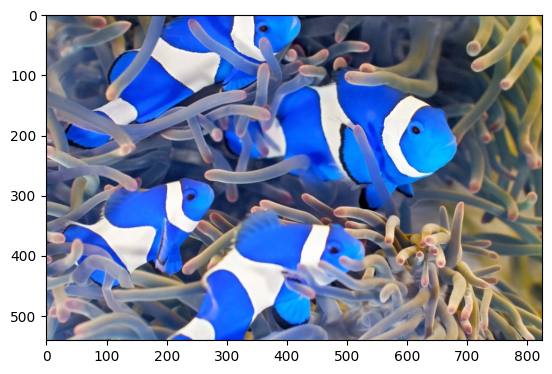

In [ ]:
img = cv2.imread('/content/drive/MyDrive/CVR Lab/clown_fish.png')
plt.imshow(img)

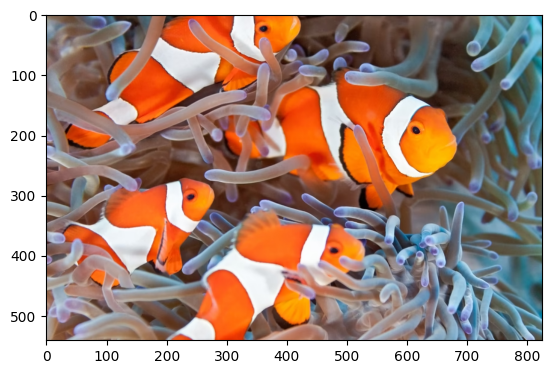

In [ ]:
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img)

In [ ]:
rgb_img.shape

(541, 825, 3)

In [ ]:
#Splitting the individual rgb color channels
r,g,b = cv2.split(rgb_img)

In [ ]:
print(r.shape)
print(g.shape)
print(b.shape)

(541, 825)
(541, 825)
(541, 825)


In [ ]:
#Convert 2D array to 1D array
print(r.flatten().shape)
print(g.flatten().shape)
print(b.flatten().shape)

(446325,)
(446325,)
(446325,)


In [ ]:
#pixel_colors = rgb_img.reshape((np.shape(rgb_img)[0] * np.shape(rgb_img)))
pixel_colors = rgb_img.reshape((-1,3))
pixel_colors.shape

(446325, 3)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors

In [ ]:
#Normalize matplotlib colors
norm = colors.Normalize()

In [ ]:
#Autoscale the image pixel color values based on normalize matplotlib
norm.autoscale(pixel_colors)

In [ ]:
#Convert the image pixel colors to list
pixel_colors = norm(pixel_colors).tolist()

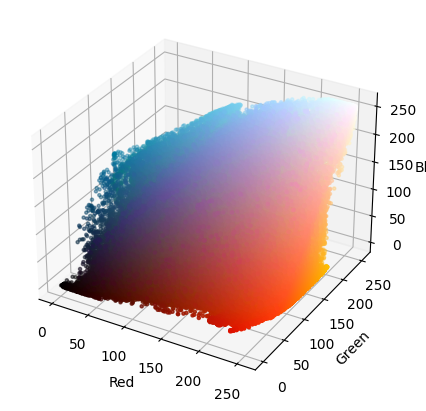

In [ ]:
#Plotting the image on 3D plot
fig = plt.figure(figsize = (5,5), dpi = 100)
axis = fig.add_subplot(1,1,1, projection = "3d")
axis.scatter(r,g,b, facecolor=pixel_colors, marker = ".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

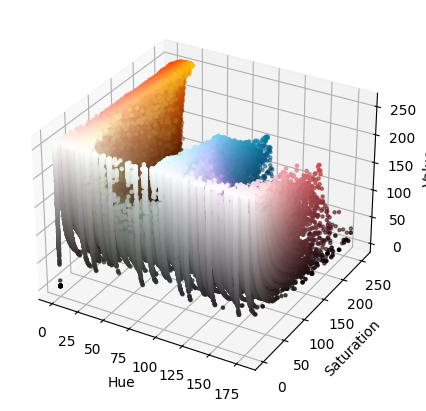

In [ ]:
img_hsv = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2HSV)
h,s,v = cv2.split(img_hsv)

fig = plt.figure(figsize = (5,5), dpi = 100)
axis = fig.add_subplot(1,1,1, projection = "3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor=pixel_colors, marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
low_thresh_orange = (0,180,100)
high_thresh_orange = (25,255,255)

In [ ]:
orange_mask = cv2.inRange(img_hsv, low_thresh_orange, high_thresh_orange)

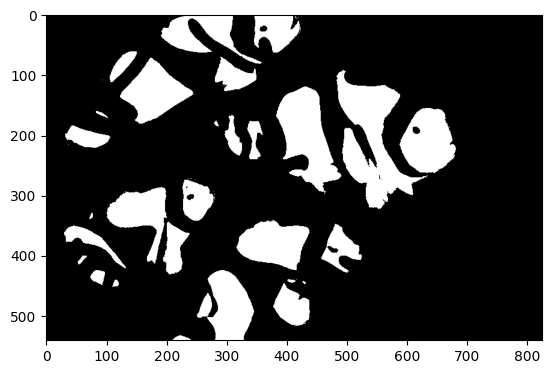

In [ ]:
plt.imshow(orange_mask, cmap='gray')

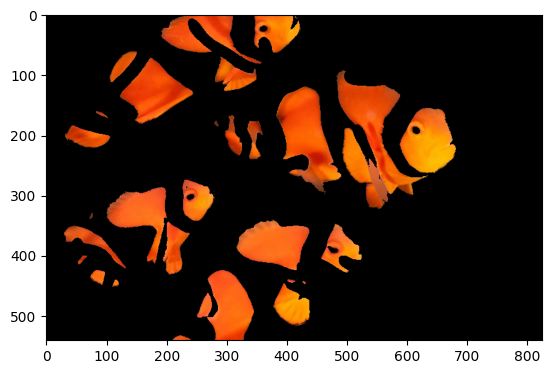

In [ ]:
orange_mask_result = cv2.bitwise_and(rgb_img, rgb_img, mask=orange_mask)
plt.imshow(orange_mask_result)

Text(0.5, 1.0, 'Segmented Image')

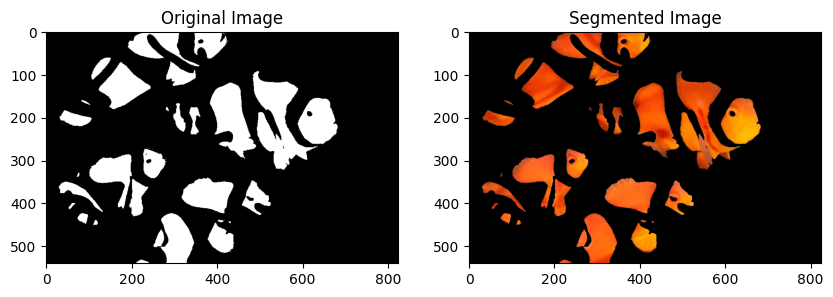

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,1)
plt.imshow(orange_mask, cmap = 'gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(orange_mask_result)
plt.title("Segmented Image")

In [ ]:
low_thresh_white = (0,0,220)
high_thresh_white = (145,70,255)

In [ ]:
white_mask = cv2.inRange(img_hsv, low_thresh_white, high_thresh_white)

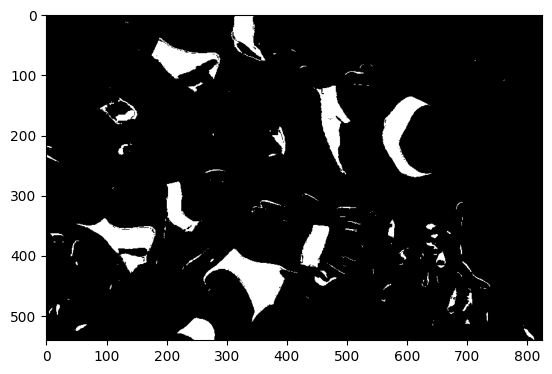

In [ ]:
plt.imshow(white_mask, cmap='gray')

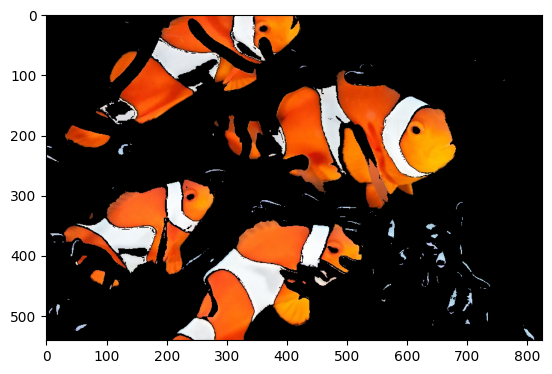

In [ ]:
final_mask = orange_mask + white_mask
final_result = cv2.bitwise_and(rgb_img, rgb_img, mask=final_mask)
plt.imshow(final_result)

Text(0.5, 1.0, 'Segmented Image')

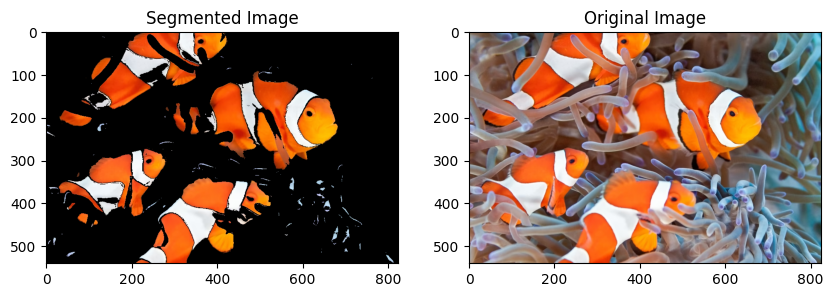

In [ ]:
plt.figure(figsize = (10,10))
plt.subplot(1,2,2)
plt.imshow(rgb_img)
plt.title("Original Image")
plt.subplot(1,2,1)
plt.imshow(final_result, cmap = 'gray')
plt.title("Segmented Image")

#**Task**

1. Import "fruit.png" image
2. convert image into RGB and HSV color channel
3. Use Thresholding segmentation approach for segmentation of fruits  (foreground objects) from image
4. Use proper morphological operation to enhance the segmentation result (e.g. erosion, dilation, opening or closing operations)
5. Import "Thresh_segmentation.png" image.
6. convert image into RGB and HSV color channel
7. Use Thresholding segmentation approach for segmentation of balls  (foreground objects) from image
8. Use proper morphological operation to enhance the segmentation result (e.g. erosion, dilation, opening or closing operations)

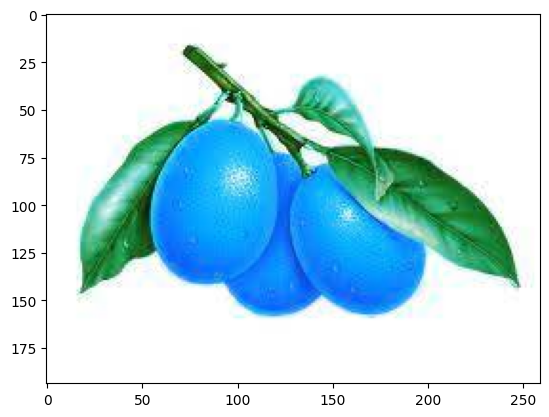

In [ ]:
img2 = cv2.imread('/content/drive/MyDrive/CVR Lab/fruit.png')
plt.imshow(img2)

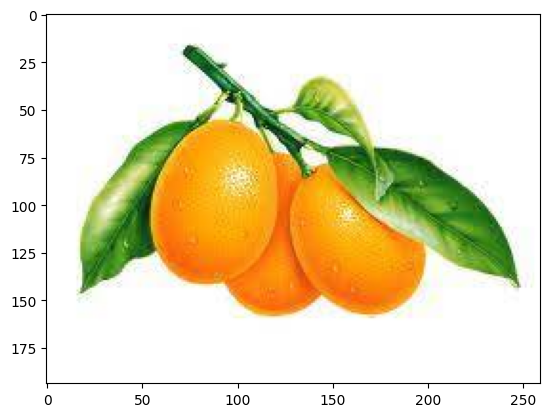

In [ ]:
rgb_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img2)

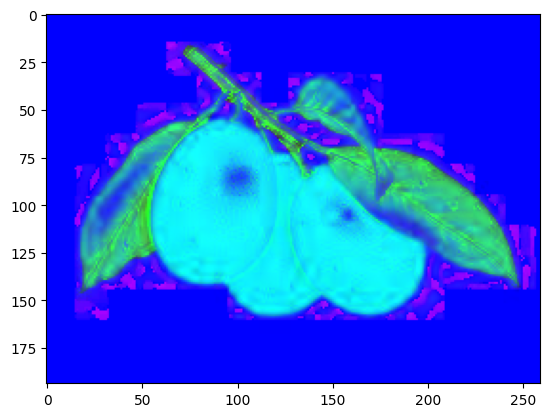

In [ ]:
hsv_img2 = cv2.cvtColor(rgb_img2, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img2)

In [ ]:
r,g,b = cv2.split(rgb_img2)

In [ ]:
print(r.shape)
print(g.shape)
print(b.shape)

(194, 259)
(194, 259)
(194, 259)


In [ ]:
#Convert 2D array to 1D array
print(r.flatten().shape)
print(g.flatten().shape)
print(b.flatten().shape)

(50246,)
(50246,)
(50246,)


In [ ]:
pixel_colors2 = rgb_img2.reshape((-1,3))
pixel_colors2.shape

(50246, 3)

In [ ]:
norm = colors.Normalize()

In [ ]:
norm.autoscale(pixel_colors2)

In [ ]:
pixel_colors2 = norm(pixel_colors2).tolist()

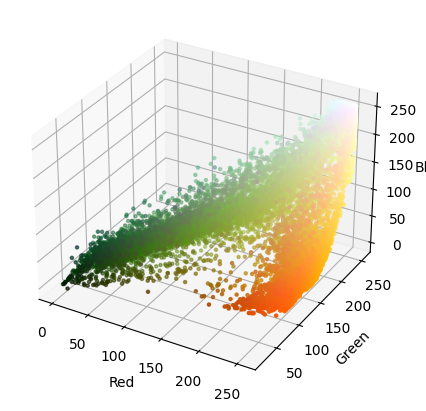

In [ ]:
fig = plt.figure(figsize = (5,5), dpi = 100)
axis = fig.add_subplot(1,1,1, projection = "3d")
axis.scatter(r,g,b, facecolor=pixel_colors2, marker = ".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

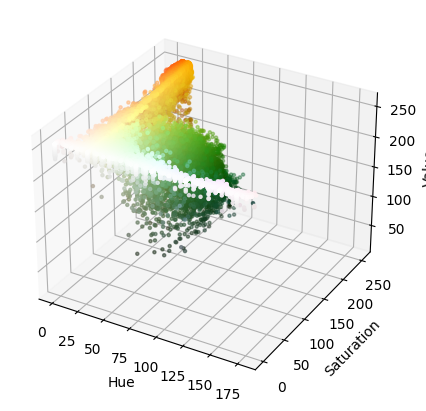

In [ ]:
h,s,v = cv2.split(hsv_img2)

fig = plt.figure(figsize = (5,5), dpi = 100)
axis = fig.add_subplot(1,1,1, projection = "3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolor=pixel_colors2, marker = ".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

In [ ]:
low_thresh_orange = (0,180,100)
high_thresh_orange = (25,255,255)

In [ ]:
orange_mask2 = cv2.inRange(hsv_img2, low_thresh_orange, high_thresh_orange)

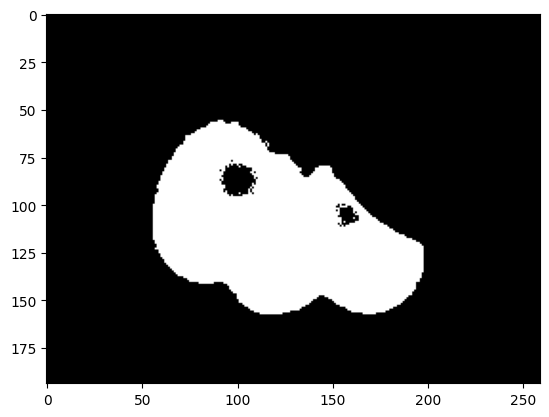

In [ ]:
plt.imshow(orange_mask2, cmap='gray')

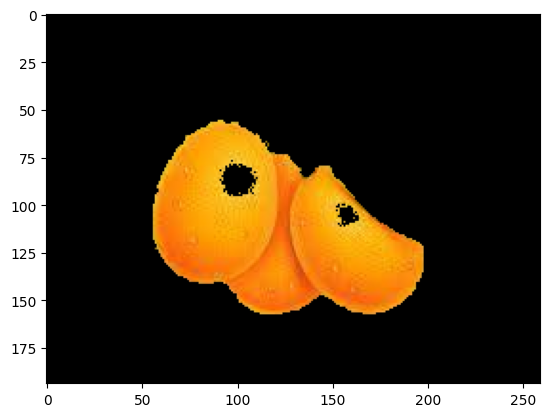

In [ ]:
orange_mask_result2 = cv2.bitwise_and(rgb_img2, rgb_img2, mask=orange_mask2)
plt.imshow(orange_mask_result2)

In [ ]:
low_thresh_green = (36, 25, 25)
high_thresh_green = (70, 255,255)

In [ ]:
green_mask = cv2.inRange(hsv_img2, low_thresh_green, high_thresh_green)

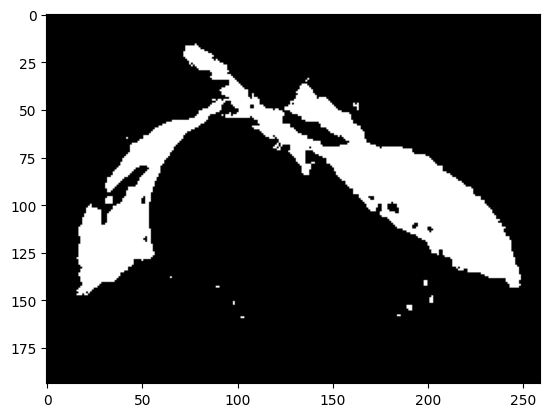

In [ ]:
plt.imshow(green_mask, cmap='gray')

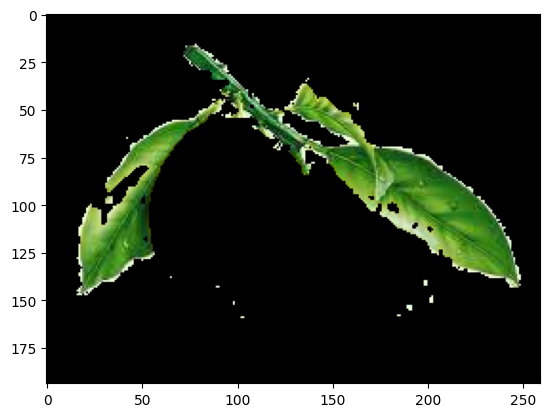

In [ ]:
green_mask_result = cv2.bitwise_and(rgb_img2, rgb_img2, mask=green_mask)
plt.imshow(green_mask_result)

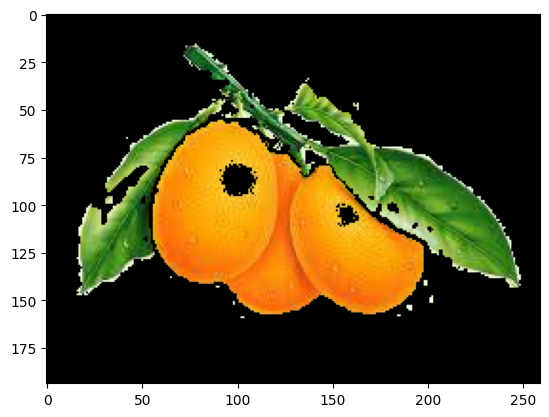

In [ ]:
final_mask2 = orange_mask2 + green_mask
final_mask_result2 = cv2.bitwise_and(rgb_img2,rgb_img2,mask =final_mask2)
plt.imshow(final_mask_result2)

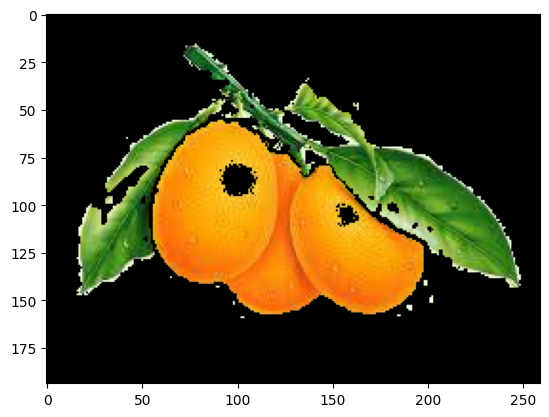

In [ ]:
kernal = np.ones((1,1))
erosion_1 = cv2.erode(final_mask_result2,kernal,iterations = 10)
plt.imshow(erosion_1)

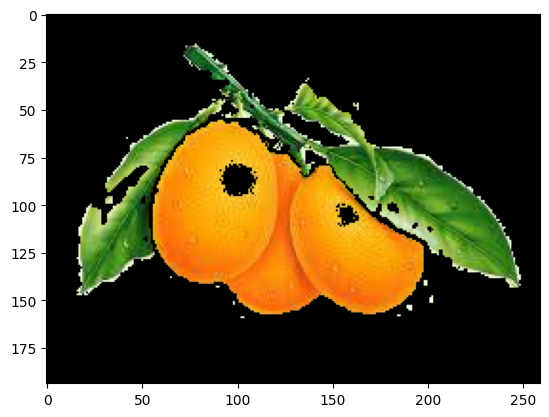

In [ ]:
kernal = np.ones((1,1))
dilate_1 = cv2.dilate(final_mask_result2,kernal,iterations =8)
plt.imshow(dilate_1)

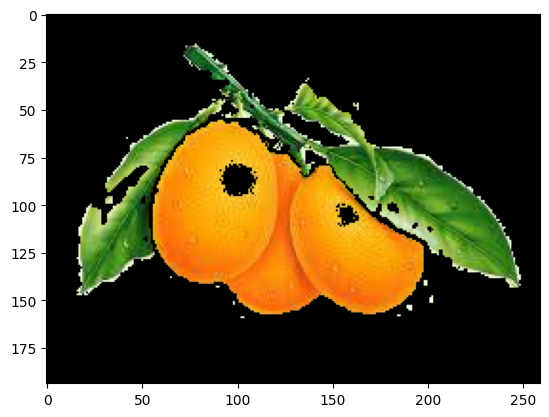

In [ ]:
opening = cv2.morphologyEx(final_mask_result2,cv2.MORPH_OPEN,kernal)
plt.imshow(opening)

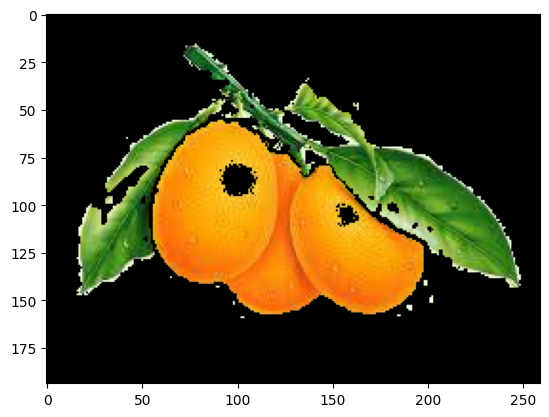

In [ ]:
closing = cv2.morphologyEx(final_mask_result2,cv2.MORPH_CLOSE,kernal)
plt.imshow(closing)

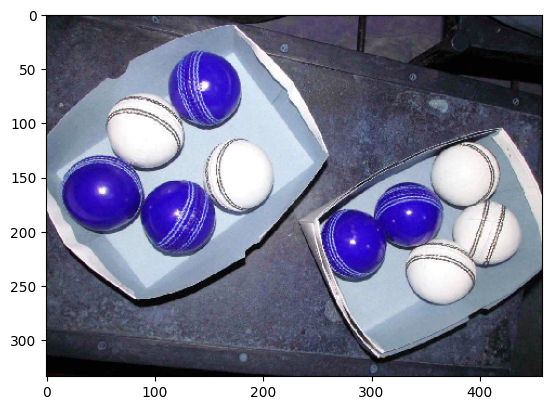

In [ ]:
img3 = cv2.imread('/content/drive/MyDrive/CVR Lab/Thresh_segmentation.png')
plt.imshow(img3)

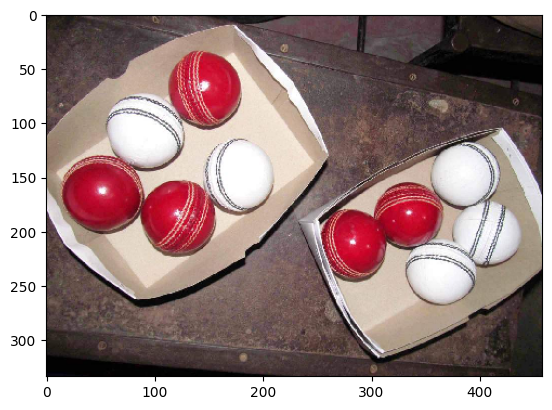

In [ ]:
rgb_img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_img3)

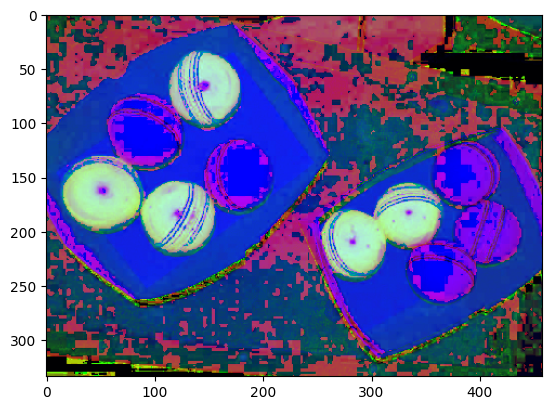

In [ ]:
hsv_img3 = cv2.cvtColor(rgb_img3, cv2.COLOR_RGB2HSV)
plt.imshow(hsv_img3)

In [ ]:
r,g,b = cv2.split(rgb_img3)

In [ ]:
pixel_colors3 = rgb_img3.reshape((-1,3))
pixel_colors3.shape

(152972, 3)

In [ ]:
norm.autoscale(pixel_colors3)

In [ ]:
pixel_colors3 = norm(pixel_colors3).tolist()

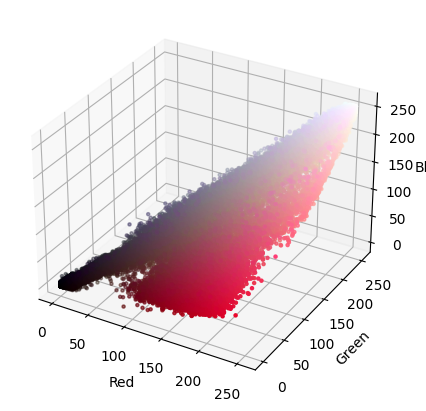

In [ ]:
fig = plt.figure(figsize =(5,5),dpi=100)
axis = fig.add_subplot(1,1,1,projection = '3d')
axis.scatter(r,g,b,facecolors = pixel_colors3,marker = '.')
axis.set_xlabel('Red')
axis.set_ylabel('Green')
axis.set_zlabel('Blue')
plt.show()

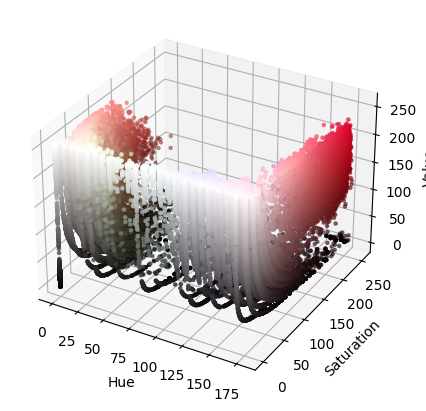

In [ ]:
h,s,v = cv2.split(hsv_img3)

fig = plt.figure(figsize =(5,5),dpi=100)
axis = fig.add_subplot(1,1,1,projection = '3d')
axis.scatter(h.flatten(),s.flatten(),v.flatten(),facecolors = pixel_colors3,marker = '.')
axis.set_xlabel('Hue')
axis.set_ylabel('Saturation')
axis.set_zlabel('Value')
plt.show()

In [ ]:
low_thresh_red = (170, 100, 100)
high_thresh_red = (180, 255, 255)

In [ ]:
red_mask = cv2.inRange(hsv_img3,low_thresh_red,high_thresh_red)

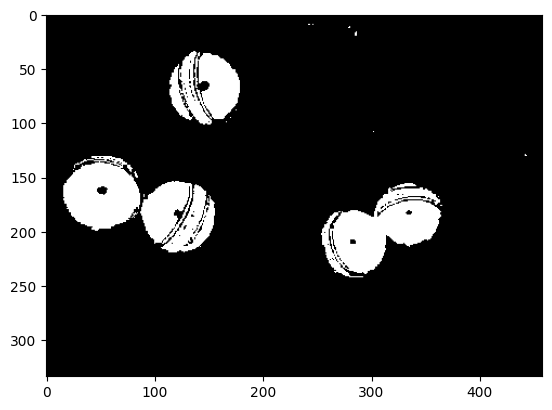

In [ ]:
plt.imshow(red_mask,cmap='gray')

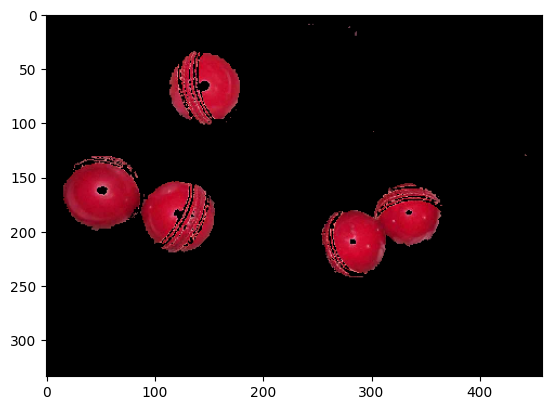

In [ ]:
red_mask_result = cv2.bitwise_and(rgb_img3,rgb_img3,mask = red_mask)
plt.imshow(red_mask_result)

In [ ]:
low_thresh_white = (0, 0, 200)
high_thresh_white = (180, 30, 255)

In [ ]:
white_mask = cv2.inRange(hsv_img3,low_thresh_white,high_thresh_white)

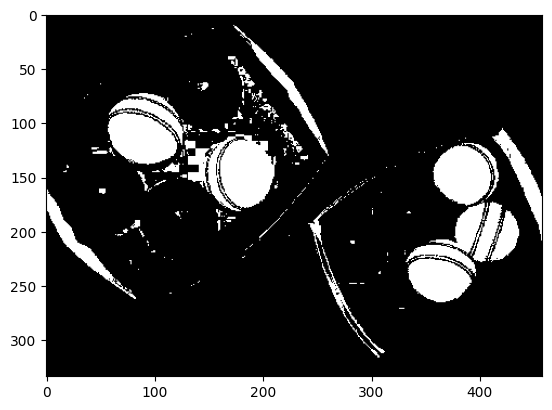

In [ ]:
plt.imshow(white_mask,cmap='gray')

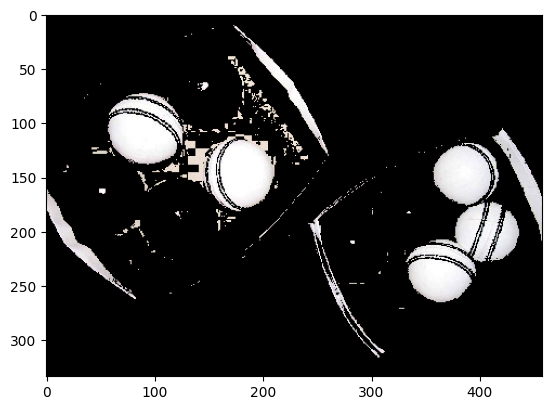

In [ ]:
white_mask_result = cv2.bitwise_and(rgb_img3,rgb_img3,mask = white_mask)
plt.imshow(white_mask_result)


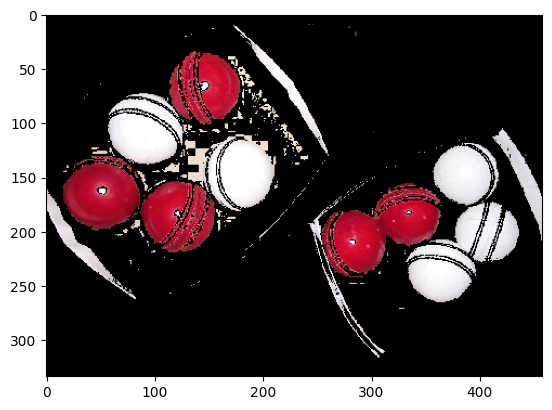

In [ ]:
final_mask3 = red_mask + white_mask
final_mask_result3 = cv2.bitwise_and(rgb_img3,rgb_img3,mask =final_mask3)
plt.imshow(final_mask_result3)

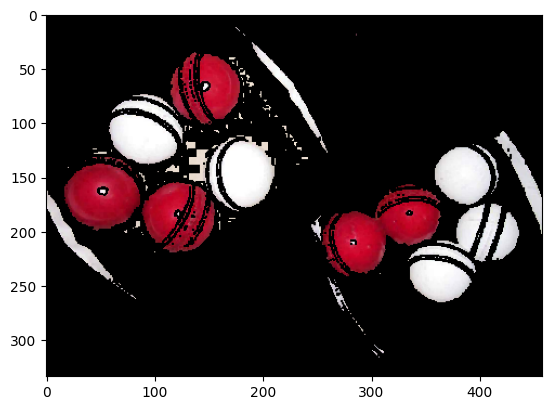

In [ ]:
kernal2 = np.ones((2,2))
erosion_2 = cv2.erode(final_mask_result3,kernal2,iterations =1)
plt.imshow(erosion_2)

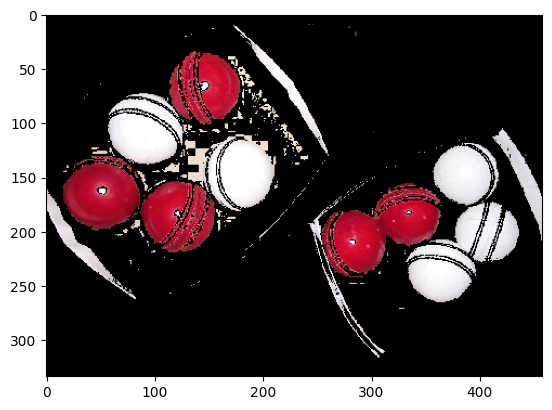

In [ ]:
kernal2 = np.ones((1,1))
dilate_2 = cv2.dilate(final_mask_result3,kernal2,iterations = 16)
plt.imshow(dilate_2)

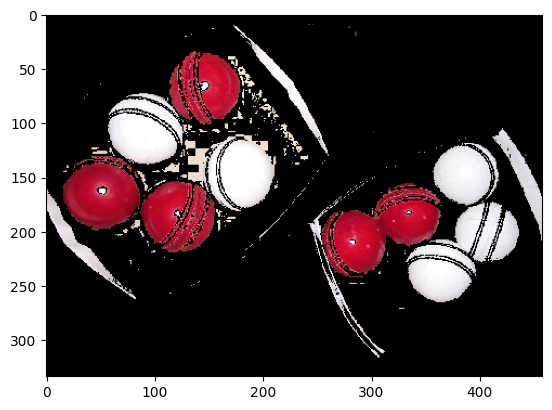

In [ ]:
opening2 = cv2.morphologyEx(final_mask_result3,cv2.MORPH_OPEN,kernal2)
plt.imshow(opening2)

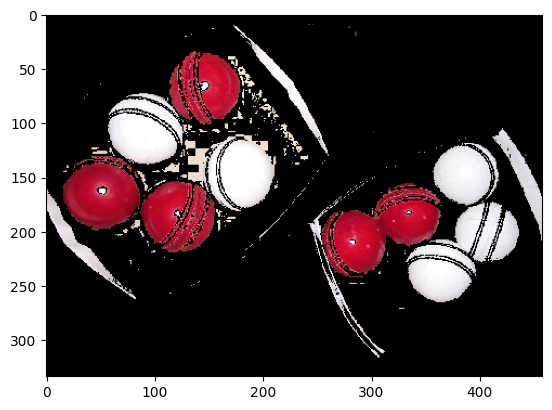

In [ ]:
closing2 = cv2.morphologyEx(final_mask_result3,cv2.MORPH_CLOSE,kernal2)
plt.imshow(closing2)

# **Conclusion**

In this experiment, we explored color image segmentation using the thresholding technique. We learned how to:

- Load and visualize color images.
- Convert images to different color spaces (RGB and HSV).
- Apply thresholding to segment objects based on color ranges.
- Use morphological operations (erosion, dilation, opening, and closing) to refine segmentation results.

We observed that thresholding is a simple yet effective method for segmenting objects in color images, especially when the objects have distinct color characteristics. However, the choice of appropriate threshold values and the use of morphological operations can significantly impact the quality of segmentation.

By experimenting with different threshold values and morphological operations, we were able to achieve satisfactory segmentation results for both the "fruit.png" and "Thresh_segmentation.png" images.

This experiment highlights the practical applications of color image segmentation in various fields, including object detection, medical imaging, remote sensing, and industrial inspection.
